# Fraud_check Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns 

In [2]:
fraud_check=pd.read_csv("https://raw.githubusercontent.com//nevased//Data-Set-for-Assignment//main//Fraud_check.csv")

In [3]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# As shown in the given dataset we should classify the target column or build a target column depends upon the feature Taxable.Income, so we will get the correct decision tree.

In [6]:
y=np.empty(600,dtype=object)
i=0
for value in fraud_check['Taxable.Income']:
    if value<= 30000:
        y[i]='Risky'
    else:
        y[i]='Good'
    i=i+1
y

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [7]:
fraud_check


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
data=fraud_check.drop(['City.Population'], axis=1)
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [9]:
data['target']=y
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,76340,7,YES,Good
596,YES,Divorced,69967,2,YES,Good
597,NO,Divorced,47334,0,YES,Good
598,YES,Married,98592,17,NO,Good


In [10]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,target
0,0,2,68833,10,1,Good
1,1,0,33700,18,1,Good
2,0,1,36925,30,1,Good
3,1,2,50190,15,1,Good
4,0,1,81002,28,0,Good
...,...,...,...,...,...,...
595,1,0,76340,7,1,Good
596,1,0,69967,2,1,Good
597,0,0,47334,0,1,Good
598,1,1,98592,17,0,Good


In [11]:
x=data.iloc[:,0:5]
y=data.iloc[:,5]

In [12]:
x

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
...,...,...,...,...,...
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0


In [13]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: target, Length: 600, dtype: object

In [14]:
data.target.unique()

array(['Good', 'Risky'], dtype=object)

In [15]:
data.target.value_counts()

Good     476
Risky    124
Name: target, dtype: int64

In [16]:
colnames=data.columns
colnames 

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience',
       'Urban', 'target'],
      dtype='object')

# Visualizations

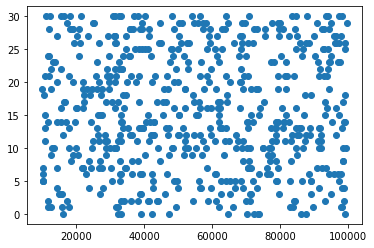

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data['Taxable.Income'],data['Work.Experience'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

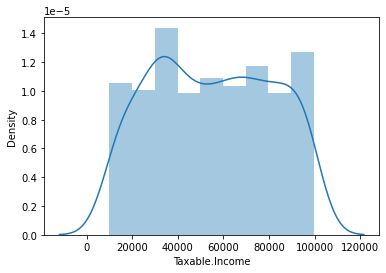

In [18]:
import seaborn as sns
sns.distplot(data['Taxable.Income'])

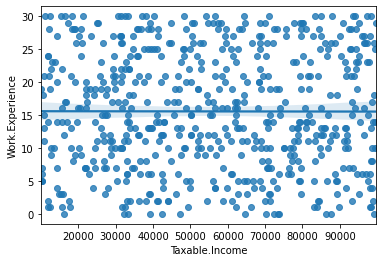

In [19]:
sns.regplot(x="Taxable.Income", y="Work.Experience", data=data);

<AxesSubplot:>

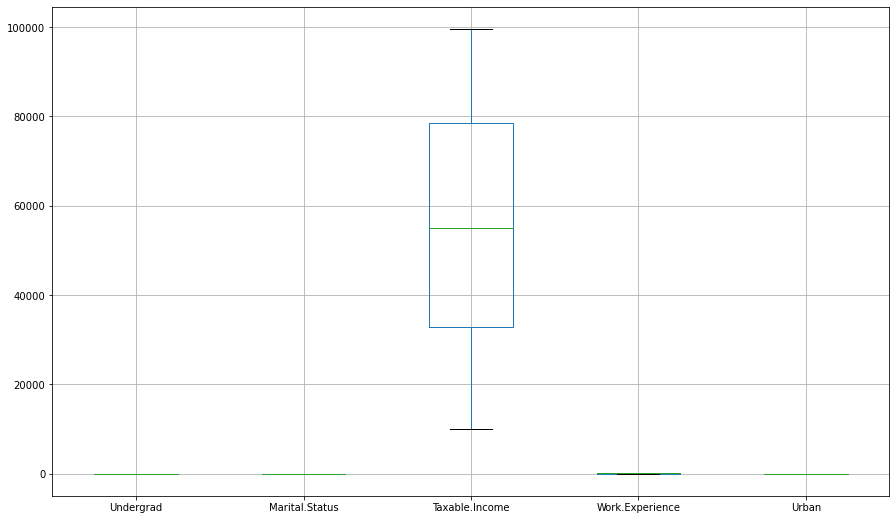

In [20]:
plt.figure(figsize=(15,9))
data.boxplot()

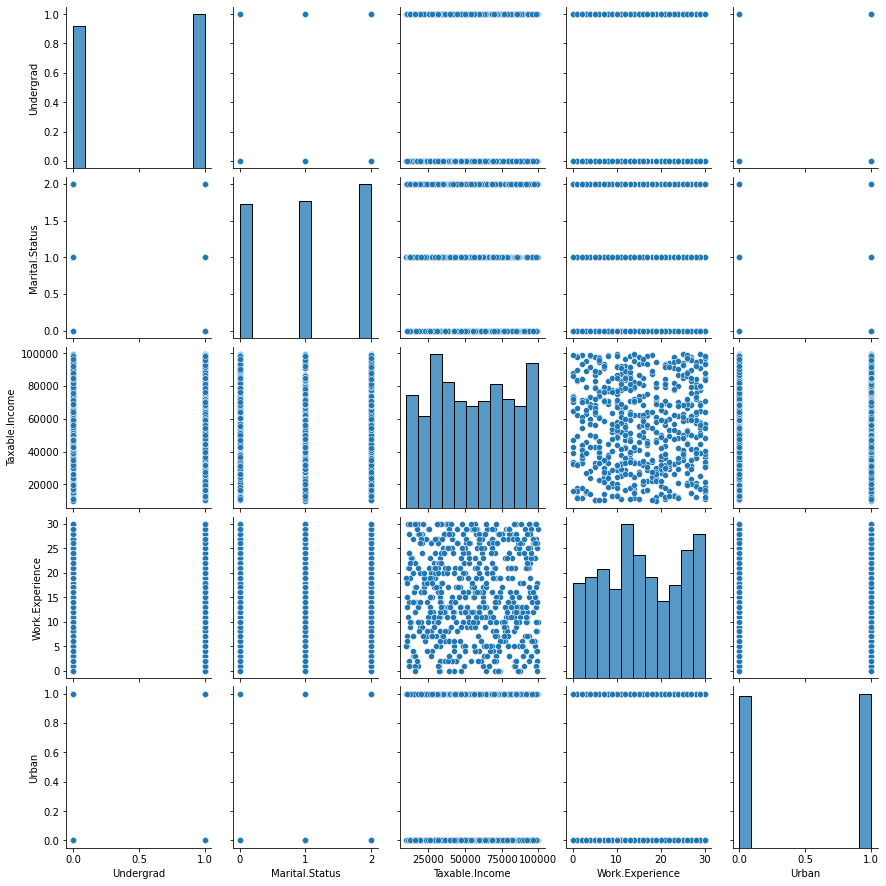

In [23]:
sns.pairplot(data)

In [24]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=60)

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

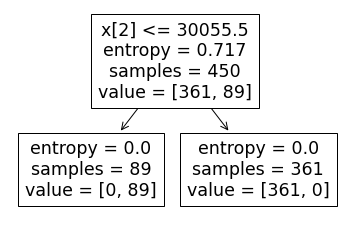

In [26]:
tree.plot_tree(model);

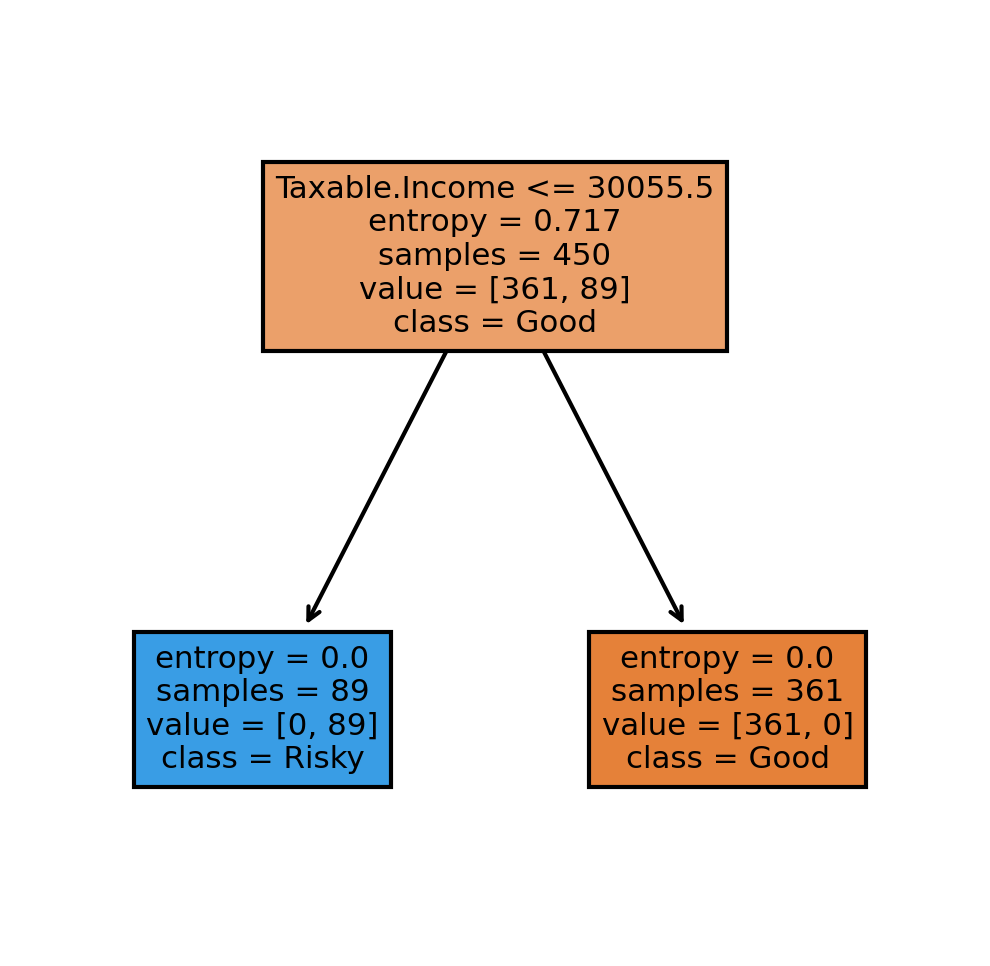

In [27]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience','Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     115
Risky     35
dtype: int64

In [29]:
preds

array(['Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risk

In [30]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
target,,
Good,115,0
Risky,0,35


# Building Decision Tree Classifier (CART) using Gini Criteria

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [32]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Example

In [34]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [35]:
label_encoder = preprocessing.LabelEncoder()
data['target']= label_encoder.fit_transform(data['target'])

In [36]:
array = data.values
X = array[:,0:5]
y = array[:,5]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [38]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
#Find the accuracy
model.score(X_test,y_test)

1.0